In [1]:
import pandas as pd
import pandas as pd
from tensorflow.keras.optimizers import Adam

import tensorflow as tf

In [2]:
dataset = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

# Read the dataset into a Pandas DataFrame
TITANIC = pd.read_csv(dataset)

In [3]:
import sys
sys.path.append('..')
from nampy.models.FTTransformerLSS import FTTransformerLSS

In [4]:
model = FTTransformerLSS(
    data=TITANIC, 
    y="survived",
    binning_task="regression",
    num_encoding="PLE",
    n_bins=50,
    batch_size=4096,
    dropout=0.5,
    attn_dropout=0.5,
    ff_dropout=0.5,
    embedding_dim=64,
    family="Logistic"
    )

optimizer = Adam(learning_rate=0.001)
model.compile(
    optimizer = optimizer,
    loss = {"output": model.Loss, "importances": None, "att_weights": None, "params":None},
    metrics= {"output": "mse", "importances": None, "att_weights": None, "params":None},)


--- Preprocessing ---


10it [00:02,  3.58it/s]
9it [00:03,  2.33it/s]


In [5]:
model.fit(
    model.training_dataset, 
    epochs=2, 
    validation_data=model.validation_dataset,
    verbose=1,
)

Epoch 1/2


1/1 [==============================] - 16s 16s/step - loss: 1.1923 - output_loss: 1.1923 - output_mse: 1.8028 - val_loss: 1.1279 - val_output_loss: 1.1279 - val_output_mse: 1.8680
Epoch 2/2
1/1 [==============================] - 1s 682ms/step - loss: 1.1273 - output_loss: 1.1273 - output_mse: 1.6562 - val_loss: 0.9588 - val_output_loss: 0.9588 - val_output_mse: 1.0438


In [6]:
model.summary()

Model: "ft_transformer_lss"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ft_transformer_encoder (FT  multiple                  574080    
 TransformerEncoder)                                             
                                                                 
 layer_normalization_8 (Lay  multiple                  128       
 erNormalization)                                                
                                                                 
 sequential_4 (Sequential)   (None, 144)               60336     
                                                                 
 dense_12 (Dense)            multiple                  288       
                                                                 
Total params: 634832 (2.42 MB)
Trainable params: 634832 (2.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


--- Preprocessing ---


10it [00:02,  3.45it/s]


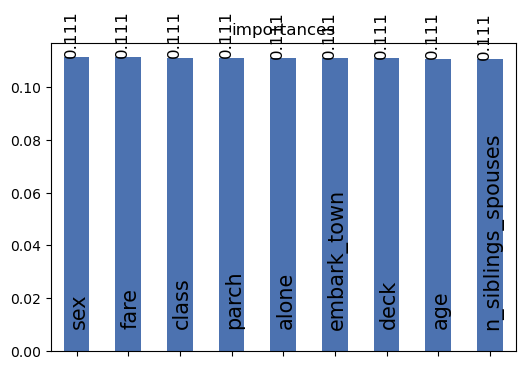

In [7]:
model.plot_importances()

--- Preprocessing ---


10it [00:02,  3.45it/s]


2/2 [==============================] - 0s 59ms/step


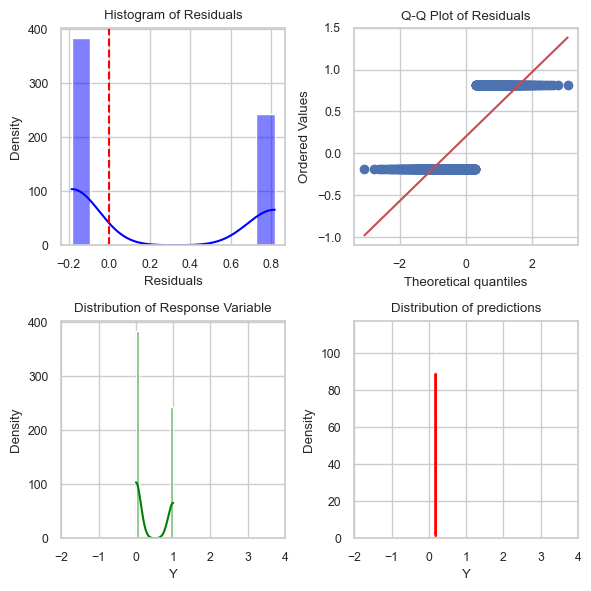

In [8]:
model.plot_analysis()

1/1 [==============================] - 0s 200ms/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


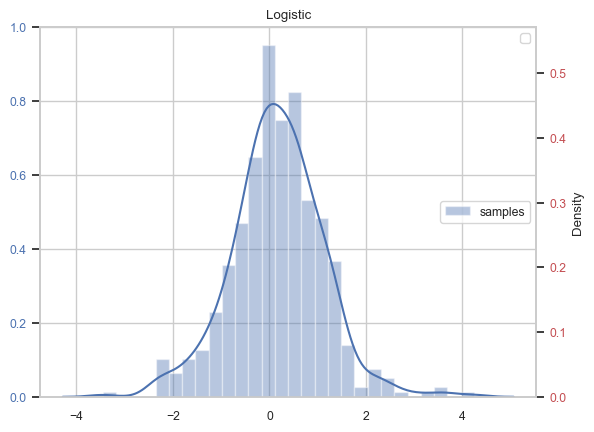

In [9]:
model.plot_dist()